In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astroquery.gaia import Gaia
from scipy.optimize import least_squares

In [2]:
table = Gaia.load_table('gaiadr2.vari_cepheid')

Retrieving table 'gaiadr2.vari_cepheid'
Parsing table 'gaiadr2.vari_cepheid'...
Done.


### Saving the list of Cepheid source IDs

In [9]:
job = Gaia.launch_job_async("select top 10000 * from gaiadr2.vari_cepheid order by source_id")
r = job.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


In [56]:
print(len(r))
sources = r['source_id']
np.savetxt('vari_cepheids.txt', sources, fmt='%i')
print(len(np.loadtxt('vari_cepheids.txt')))

9575
9575


In [131]:
r['int_average_g'][np.argwhere(r['source_id']==2947530506428832768)]

12.67701578903637


### Light curve pipeline

In [4]:
lcs = np.loadtxt('light_curves_first.txt',skiprows=1,delimiter=',',usecols=(0,3,4,5))
lcs_band = np.loadtxt('light_curves_first.txt',skiprows=1,delimiter=',',usecols=2, dtype=np.str)

In [6]:
source_id = lcs[:,0]
band = lcs_band
time = lcs[:,1]
mag = lcs[:,2]
flux = lcs[:,3]
print(source_id)

[2.94523644e+18 2.94523644e+18 2.94523644e+18 ... 2.96334763e+18
 2.96334763e+18 2.96334763e+18]


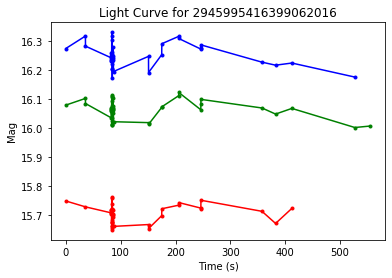

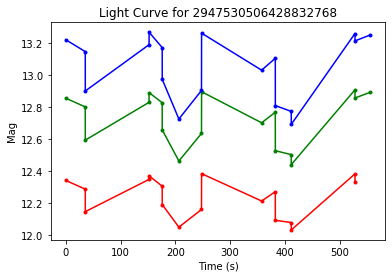

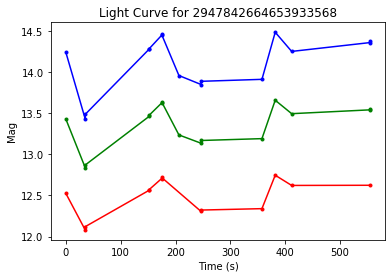

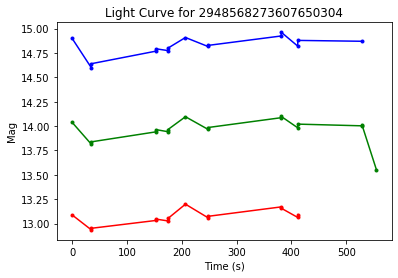

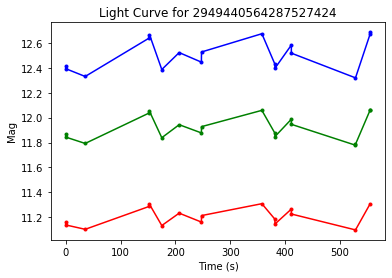

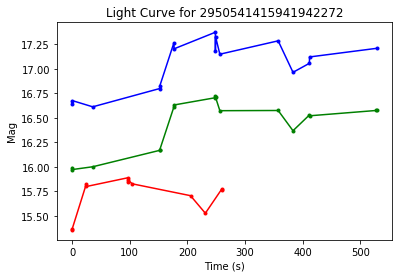

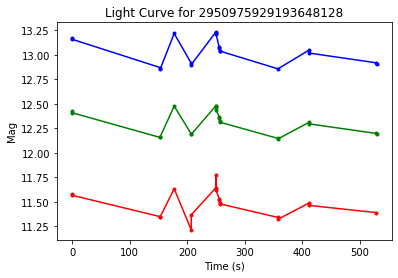

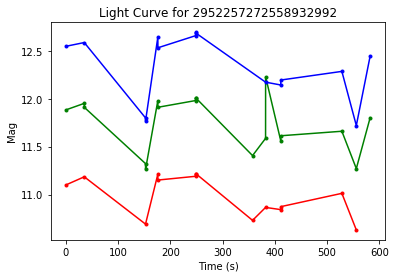

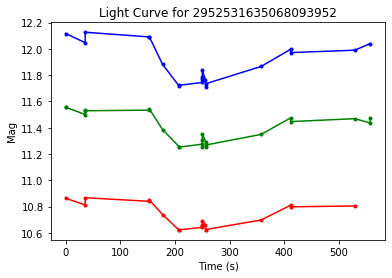

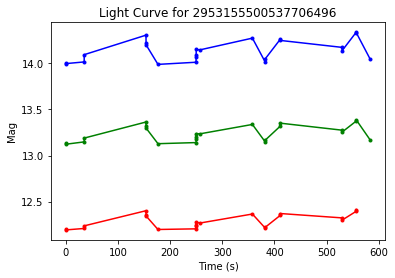

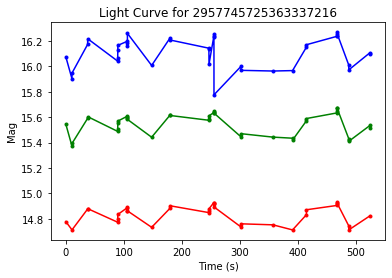

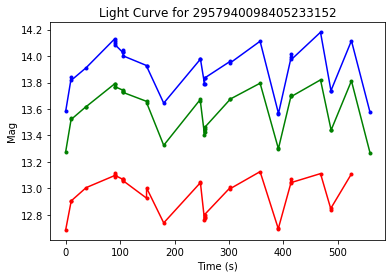

In [130]:
sources = np.loadtxt('vari_cepheids.txt')
for i in range (0, 3125):
    asas_ind = np.argwhere(source_id==int(sources[i]))
    if len(asas_ind) == 0:
        continue
    #Properties of each source
    asas_mag = mag[asas_ind[0][0]:asas_ind[-1][0]]
    asas_time = time[asas_ind[0][0]:asas_ind[-1][0]]
    asas_flux = flux[asas_ind[0][0]:asas_ind[-1][0]]
    asas_band = band[asas_ind[0][0]:asas_ind[-1][0]]
    #Properties of each source seperated by band
    G_ind = np.argwhere(asas_band=='G')
    BP_ind = np.argwhere(asas_band=='BP')
    RP_ind = np.argwhere(asas_band=='RP')
    asas_time_G = asas_time[G_ind[0][0]:G_ind[-1][0]]
    asas_time_BP = asas_time[BP_ind[0][0]:BP_ind[-1][0]]
    asas_time_RP = asas_time[RP_ind[0][0]:RP_ind[-1][0]]
    asas_mag_G = asas_mag[G_ind[0][0]:G_ind[-1][0]]
    asas_mag_BP = asas_mag[BP_ind[0][0]:BP_ind[-1][0]]
    asas_mag_RP = asas_mag[RP_ind[0][0]:RP_ind[-1][0]]
    asas_flux_G = asas_flux[G_ind[0][0]:G_ind[-1][0]]
    asas_flux_BP = asas_flux[BP_ind[0][0]:BP_ind[-1][0]]
    asas_flux_RP = asas_flux[RP_ind[0][0]:RP_ind[-1][0]]
    #Plotting light curves
    plt.plot(asas_time_G-asas_time_G[0], asas_mag_G, 'g.-')
    plt.plot(asas_time_BP-asas_time_BP[0], asas_mag_BP, 'b.-')
    plt.plot(asas_time_RP-asas_time_RP[0], asas_mag_RP, 'r.-')
    plt.title('Light Curve for ' + str(int(sources[i])))
    plt.xlabel('Time (s)')
    plt.ylabel('Mag')
    #plt.savefig('LightCurve'+str(int(sources[i]))+'.png', bboxes='tight', dpi=300)
    plt.show()

In [128]:
for i in range (0, 3125):
    asas_ind = np.argwhere(source_id==int(sources[i]))
    if len(asas_ind) == 0:
        continue
    int_av_mag = r['int_average_g'][np.argwhere(r['source_id']==int(sources[i]))]
    lc_mag = np.mean(asas_mag_G)
    print(int_av_mag)
    #print(abs(int_av_mag - lc_mag))
#From looking at the job.get_results() table, it does look like every source_id has an int_average_g listed. 
#So why does this loop return some empty values?

int_average_g [1]
       mag       
-----------------
int_average_g [1]
       mag       
-----------------
12.67701578903637
int_average_g [1]
       mag       
-----------------
int_average_g [1]
       mag       
-----------------
int_average_g [1]
       mag       
-----------------
int_average_g [1]
       mag       
-----------------
int_average_g [1] 
       mag        
------------------
12.299228216064162
int_average_g [1]
       mag       
-----------------
int_average_g [1]
       mag       
-----------------
11.40923192393765
int_average_g [1]
       mag       
-----------------
int_average_g [1]
       mag       
-----------------
int_average_g [1]
       mag       
-----------------
